<a href="https://colab.research.google.com/github/angelishhha/ml_course/blob/master/lab2/using%20pandas%20and%20pandasql%20library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pandasql


  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
%matplotlib inline 
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn 
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize']= 8, 5

In [0]:
data = pd.read_csv('user_usage.csv')
data.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [0]:
data1 = pd.read_csv('user_device.csv')
data1.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [0]:
def example1_pandasql(data1):
    simple_query = '''
        SELECT 
            user_id, 
            platform,
            device
        FROM data1
        ORDER BY use_id
        LIMIT 10
        '''
    return ps.sqldf(simple_query, locals())

In [0]:
example1_pandasql(data1)

,user_id,platform,device
0,26980,ios,"iPhone7,2"
1,29628,android,Nexus 5
2,28473,android,SM-G903F
3,15200,ios,"iPhone7,2"
4,28239,android,ONE E1003
5,12921,android,GT-I9505
6,28714,android,SM-G930F
7,28714,android,SM-G930F
8,29592,android,D2303
9,28775,ios,"iPhone6,2"


The query joins data sets

In [0]:
#pandasql code
def example1_pandasql(data, data1):
  join_query = '''
      SELECT
       user_id, 
        platform,
        platform_version,
        device,
        outgoing_sms_per_month,
        monthly_mb, 
        outgoing_mins_per_month,
        outgoing_sms_per_month
       
            
          
            
        FROM data as d JOIN data1 as d1 ON (d.use_id = d1.use_id)
        
       '''
  return ps.sqldf(join_query, locals())

#pandas code
def example1_pandas(data, data1):
  join_que = pd.merge(data,
                 data1[['use_id', 'platform', 'platform_version', 'device', 
                        'outgoing_sms_per_month', 'monthly_mb', 'outgoing_mins_per_month', 
                        'outgoing_sms_per_month' ]],
                 on='use_id')
  print(join_que)

In [0]:
example1_pandasql(data, data1)

,user_id,platform,platform_version,device,outgoing_sms_per_month,monthly_mb,outgoing_mins_per_month,outgoing_sms_per_month
0,12921,android,4.3,GT-I9505,4.82,1557.33,21.97,4.82
1,28714,android,6.0,SM-G930F,136.88,7267.55,1710.08,136.88
2,28714,android,6.0,SM-G930F,136.88,7267.55,1710.08,136.88
3,29592,android,5.1,D2303,35.17,519.12,94.46,35.17
4,28217,android,5.1,SM-G361F,79.26,1557.33,71.59,79.26
5,28217,android,5.1,SM-G361F,79.26,1557.33,71.59,79.26
6,28217,android,5.1,SM-G361F,79.26,519.12,71.59,79.26
7,28217,android,5.1,SM-G361F,79.26,519.12,71.59,79.26
8,29643,android,6.0,ONEPLUS A3003,22.77,3114.67,30.92,22.77
9,10976,android,4.4,GT-I9505,14.70,25955.55,69.80,14.70


In [0]:
example1_pandas(data, data1)

KeyError: ignored

The query groups data sets using aggregate functions



In [0]:
# pandasql code
def example2_pandasql(data):
    aggr_query = '''
        SELECT 
            avg(outgoing_mins_per_month) as outgoing_mins_per_month,
            monthly_mb
        FROM data
        GROUP BY monthly_mb
        '''
    return ps.sqldf(aggr_query, locals()).set_index('monthly_mb')
  
  # pandas code
def example2_pandas(data):
  aggr_que = data.groupby('monthly_mb').agg({"outgoing_mins_per_month": "sum"})
  print(aggr_que)


In [0]:
example2_pandasql(data)

,outgoing_mins_per_month
monthly_mb,
0.00,227.130000
11.68,124.700000
33.79,29.540000
74.40,12.850000
212.64,70.340000
265.81,341.850000
362.02,463.050000
369.84,190.080000
407.01,85.970000


In [0]:
example2_pandas(data)

            outgoing_mins_per_month
monthly_mb                         
0.00                         227.13
11.68                        124.70
33.79                         29.54
74.40                         12.85
212.64                        70.34
265.81                       341.85
362.02                       463.05
369.84                       190.08
407.01                        85.97
415.10                       436.37
480.25                       134.87
519.12                      4876.56
541.39                       242.41
625.40                       397.80
634.28                       335.03
650.92                        50.68
664.33                       206.03
703.72                       111.74
738.36                      1816.63
803.24                       119.80
860.88                       148.94
894.58                       305.58
896.96                       521.32
1038.21                      603.44
1045.39                      410.80
1132.23                     

In [0]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [0]:
ex2_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(example2_pandasql, [data[:count]])
    pandas_time = count_mean_time(example2_pandas, [data[:count]])
    ex2_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [0]:
ex2_times_df = pd.DataFrame(ex2_times)

In [0]:
ex2_times_df.columns = ['number of rows in user_usage', 'pandas time', 'pandasql time']
ex2_times_df = ex2_times_df.set_index('number of rows in user_usage')

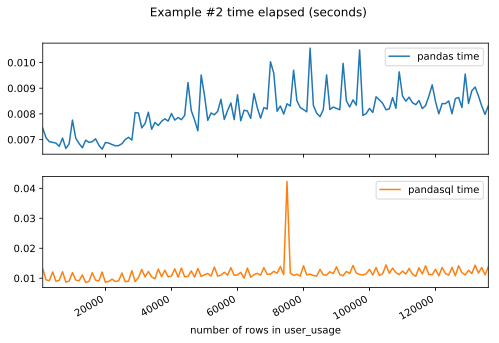

In [0]:
ax = ex2_times_df.plot(title = 'Example #2 time elapsed (seconds)', subplots = True)

In [0]:
all_users = data.outgoing_mins_per_month.unique().tolist()
len(all_users)

178

In [0]:
ex3_times = []
for users_count in range(10, 1310, 10):
    users = all_users[:users_count]
    data_sample = data[data.outgoing_mins_per_month.isin(users)]
    count = data_sample.shape[0]
    pandasql_time = count_mean_time(example2_pandasql, [data_sample])
    pandas_time = count_mean_time(example2_pandas, [data_sample])
    ex3_times.append({ 'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

            outgoing_mins_per_month
monthly_mb                         
519.12                       751.08
1557.33                      165.15
3114.67                      585.33
7267.55                     3420.16
15573.33                     283.30
25955.55                      69.80
            outgoing_mins_per_month
monthly_mb                         
519.12                       751.08
1557.33                      165.15
3114.67                      585.33
7267.55                     3420.16
15573.33                     283.30
25955.55                      69.80
            outgoing_mins_per_month
monthly_mb                         
519.12                       751.08
1557.33                      165.15
3114.67                      585.33
7267.55                     3420.16
15573.33                     283.30
25955.55                      69.80
            outgoing_mins_per_month
monthly_mb                         
519.12                       751.08
1557.33                     

In [0]:
ex3_times_df = pd.DataFrame(ex3_times).set_index('count')

Text(0, 0.5, 'time, seconds')

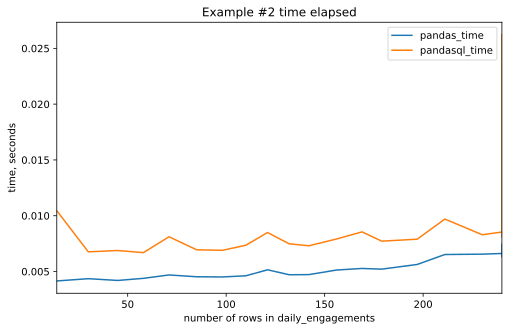

In [0]:
ax = ex3_times_df.plot(title = 'Example #2 time elapsed')
ax.set_xlabel('number of rows in daily_engagements')
ax.set_ylabel('time, seconds')